In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [201]:
data = pd.read_csv("../Data/Bank/Bank.csv",header = 0,sep=";")

In [202]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [203]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [204]:
data.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [205]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [206]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [207]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

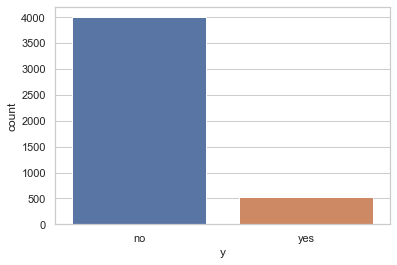

In [208]:
sns.countplot(x='y',data=data)

In [209]:
count_no_sub = len(data[data['y']=="no"])
count_sub = len(data[data['y']=="yes"])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.47600088476001
percentage of subscription 11.523999115239992


In [11]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021


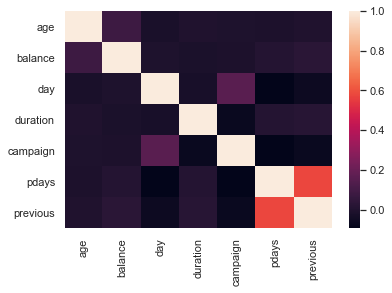

In [12]:
sns.heatmap(data.corr())

In [210]:
correlated_features = set()
correlation_matrix = df.drop('y', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [211]:
correlated_features

{'contact_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'poutcome_unknown'}

In [212]:
#dropping correlated features
df.drop(['contact_unknown'], axis=1)
df.drop(['default_yes'], axis=1)
df.drop(['housing_yes'], axis=1)
df.drop(['loan_yes'], axis=1)
df.drop(['poutcome_unknown'], axis=1)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,30,1787,19,79,1,-1,0,NaN,0,0,...,0,0,0,0,0,1,0,0,0,0
1,33,4789,11,220,1,339,4,NaN,0,0,...,0,0,0,1,0,0,0,1,0,0
2,35,1350,16,185,1,330,1,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30,1476,3,199,4,-1,0,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
4,59,0,5,226,1,-1,0,NaN,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
4517,57,-3313,9,153,1,-1,0,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
4518,57,295,19,151,11,-1,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,28,1137,6,129,4,211,3,NaN,0,1,...,0,0,0,0,0,0,0,0,1,0


In [213]:
cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']
cat_list = pd.get_dummies(data, columns=cols)

In [214]:
df = cat_list

In [215]:
df.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0


In [216]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=="no"]))
print("Number of subscription",len(os_data_y[os_data_y['y']=="yes"]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=="no"])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=="yes"])/len(os_data_X))

length of oversampled data is  5620
Number of no subscription in oversampled data 2810
Number of subscription 2810
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [19]:
! pip install --user <imblearn>

/bin/sh: -c: line 0: syntax error near unexpected token `newline'
/bin/sh: -c: line 0: ` pip install --user <imblearn>'


In [21]:
# conda install -c conda-forge imbalanced-learn

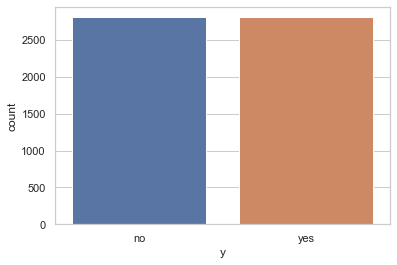

In [217]:
sns.countplot(x='y',data=os_data_y)

In [233]:
data_final_vars=df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
f = rfe.support_
print(f)
print(rfe.ranking_)
# print([df.columns[f]])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

[False False False False False False False  True  True  True False False
 False False  True False  True False False  True  True  True  True  True
  True  True False False  True  True False False  True  True  True False
 False False False False False False False False False False False  True
  True False  True]
[27 32 28 30 29 31 26  1  1  1  2  5  7  4  1  6  1  3  8  1  1  1  1  1
  1  1 23 25  1  1 10  9  1  1  1 18 12 20 17 11 13 16 22 15 14 21 19  1
  1 24  1]


In [287]:
cols=df.iloc[:,:32].columns
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
    'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no']
X=os_data_X[cols]
y=os_data_y['y']

In [290]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no
0,40,56,29,194,1,247,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,47,440,12,91,1,-1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
2,52,3554,8,89,1,-1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,31,0,29,82,5,-1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,33,-346,23,29,3,-1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,39,341,4,778,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5616,37,5303,19,419,3,-1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
5617,49,50,19,229,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
5618,36,2694,25,773,2,-1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1


In [259]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

TypeError: '>=' not supported between instances of 'str' and 'int'

In [48]:
#RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

X = df.drop('y', axis=1)
y = df['y']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [49]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 19


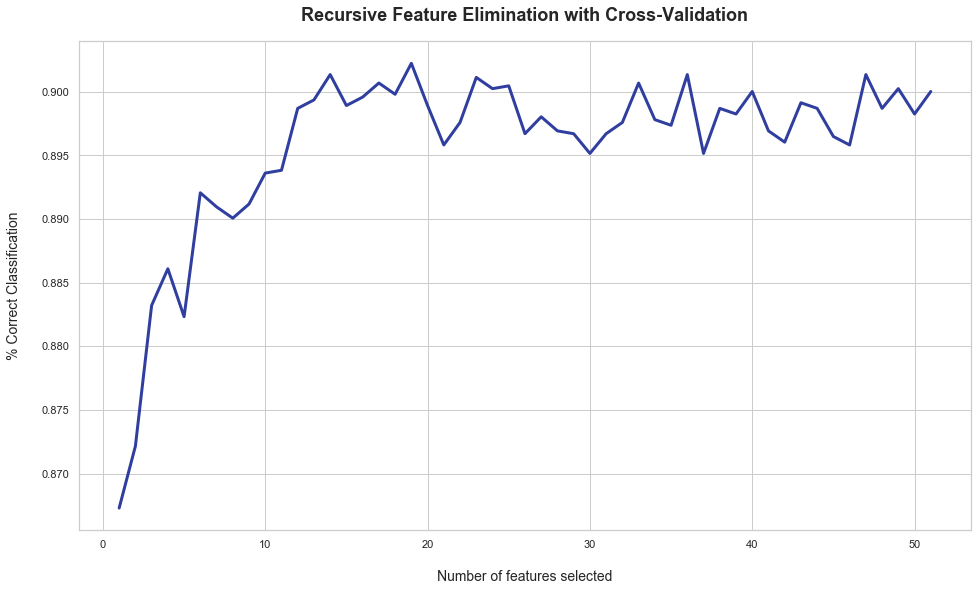

In [50]:
#Best number of features
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [51]:
#Features with least importance

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 7  8  9 10 12 13 14 15 17 18 19 21 22 25 26 27 29 30 31 33 34 35 37 38
 39 40 42 44 46 47 48 50]


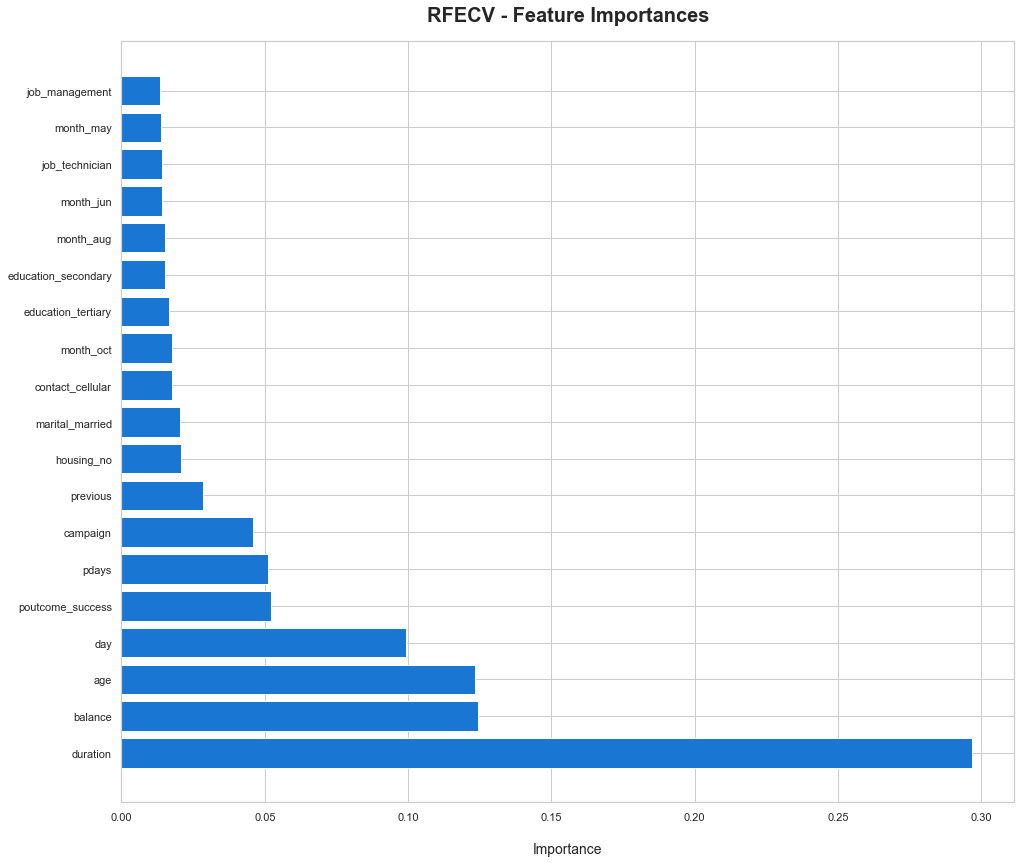

In [52]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [283]:
# y = np.reshape(y,1, -1) ,
X = np.reshape(y,-1, 1)

In [285]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [239]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[750  91]
 [113 732]]


In [240]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.87      0.89      0.88       841
         yes       0.89      0.87      0.88       845

    accuracy                           0.88      1686
   macro avg       0.88      0.88      0.88      1686
weighted avg       0.88      0.88      0.88      1686



In [291]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: could not convert string to float: 'yes'

In [261]:
y_true

NameError: name 'y_true' is not defined

In [195]:
y_test1 = y_test1.map({'yes': 1, 'no': 0})

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4815,28,5328,15,243,1,71,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4392,33,5115,24,220,3,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700,50,3357,9,239,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
914,42,352,11,79,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2012,32,493,13,289,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,43,483,12,225,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3992,32,707,15,566,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3453,47,-308,6,757,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5427,45,32,28,247,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
